# Storing Histograms in Hepfiles
A great example of the use of hepfiles is storing information about many histograms with varying numbers of bins in a hepfile. This tutorial walks through this process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hepfile as hf

## Generating a Dataset
We first generate 5 random datasets with varying length. If you are planning to do this, you probably already have your dataset, this is just for an example.

In [2]:
# generate some random normally distributed datasets
datasets = []
for i in range(1,6):
    rand = np.random.normal(size=10**i)
    datasets.append(rand)

## Preparing the Dataset
Then, we can calculate/create the following information about each dataset:
* bins and edge information from numpy histogram
* x-label
* y-label
* title

You can imagine that each histogram is like an "event" which allows us to pack the bins and edge information in a group called `histogram` and the rest of the information as singletons. To easily pack the data into a hepfile, we can store all of this information in a list of dictionaries. This will allow us to call `hepfile.dict_tools.dictlike_to_hepfile` easily. 

We also plot the histogram data we calculate so that you can see what the datasets look like and how they differ!

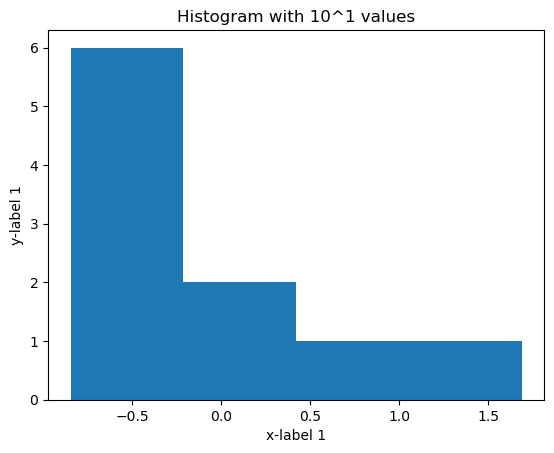

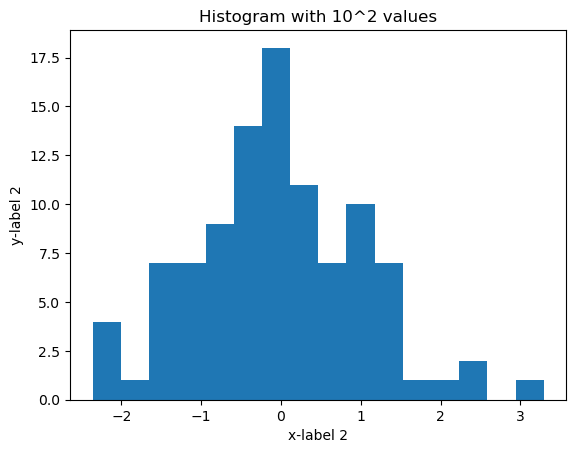

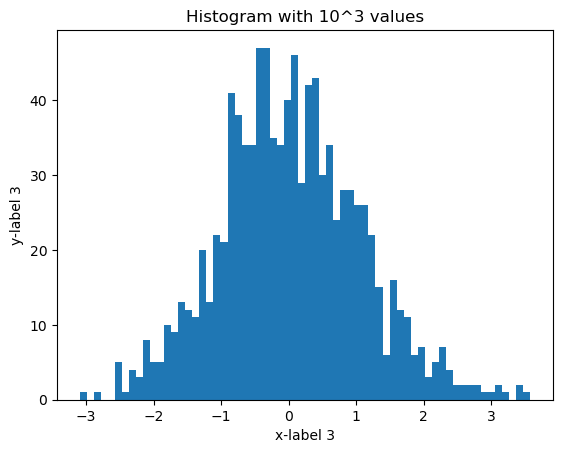

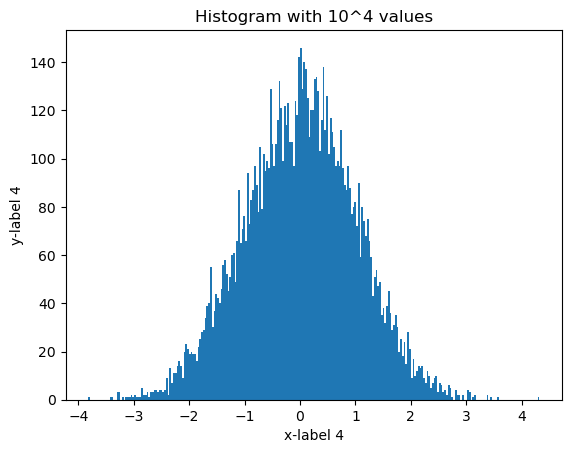

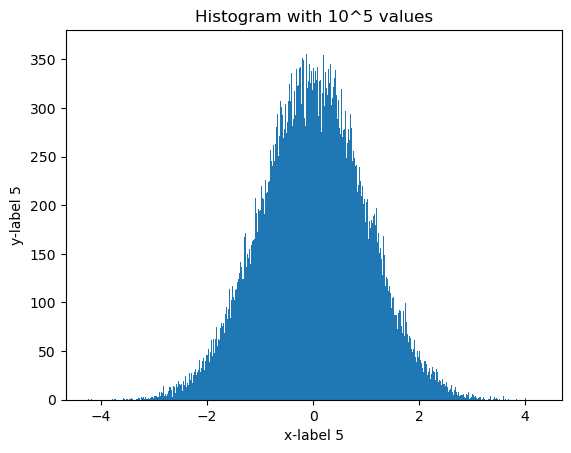

In [16]:
data_dicts = []

for rand in datasets:
    
    i = int(np.log10(len(rand)))
    
    # append an empty dictionary to store the data about this histogram in
    data_dicts.append({}) 
    
    # generate random data and then the histogram bins and edges using numpy
    # vary the number of bins because that's what hepfile is good at!
    bins, edges = np.histogram(rand, bins=int(4**i)) 
    
    # plot this data
    plt.figure()
    plt.bar(edges[:-1], bins, align='edge', width=edges[1]-edges[0])
    
    ylabel = f'y-label {i}'
    plt.ylabel(ylabel)
    data_dicts[-1]['ylabel'] = ylabel # store the ylabel in the recently appended dict
    
    xlabel = f'x-label {i}'
    plt.xlabel(xlabel)
    data_dicts[-1]['xlabel'] = xlabel # store the xlabel in the recently appended dict
    
    title = f'Histogram with 10^{i} values'
    plt.title(title)
    data_dicts[-1]['title'] = title # store the title in the recently appended dict
    
    # store the bin and edge information in a sub dictionary
    data_dicts[-1]['histogram'] = {}
    data_dicts[-1]['histogram']['bins'] = bins
    data_dicts[-1]['histogram']['edges'] = edges

Below is the list of data dictionaries that we plan to store in the hepfile. Notice how it is heterogeneous and the lengths of the bins and edges arrays vary between histograms!

In [17]:
print(data_dicts)

[{'ylabel': 'y-label 1', 'xlabel': 'x-label 1', 'title': 'Histogram with 10^1 values', 'histogram': {'bins': array([6, 2, 1, 1]), 'edges': array([-0.845387  , -0.21215926,  0.42106847,  1.0542962 ,  1.68752394])}}, {'ylabel': 'y-label 2', 'xlabel': 'x-label 2', 'title': 'Histogram with 10^2 values', 'histogram': {'bins': array([ 4,  1,  7,  7,  9, 14, 18, 11,  7, 10,  7,  1,  1,  2,  0,  1]), 'edges': array([-2.35708618, -2.00407388, -1.65106159, -1.29804929, -0.945037  ,
       -0.59202471, -0.23901241,  0.11399988,  0.46701217,  0.82002447,
        1.17303676,  1.52604905,  1.87906135,  2.23207364,  2.58508593,
        2.93809823,  3.29111052])}}, {'ylabel': 'y-label 3', 'xlabel': 'x-label 3', 'title': 'Histogram with 10^3 values', 'histogram': {'bins': array([ 1,  0,  1,  0,  0,  5,  1,  4,  3,  8,  5,  5, 10,  9, 13, 12, 11,
       20, 13, 22, 21, 41, 38, 34, 34, 47, 47, 35, 34, 40, 46, 29, 42, 43,
       30, 34, 24, 28, 28, 26, 26, 22, 15,  6, 16, 12, 11,  6,  7,  3,  5,
        7

## Writing the hepfile

Now that we have a list of dictionaries, we can easily write this to a hepfile using `hepfile.dict_tools.dictlike_to_hepfile`:

In [18]:
# data_dicts is in a format we can easily save to a hepfile!
filename = 'histogram-hepfile.h5'
data = hf.dict_tools.dictlike_to_hepfile(data_dicts, filename)

Writing the hdf5 file from the awkward array...
Metadata added


Then we can view the data from the awkward array that is returned! Also note that data has been saved as a hepfile called `histogram-hepfile.h5` that can be read in using `hepfile.load` if you wish.

In [19]:
data.histogram.bins

<Array [[6, 2, 1, 1], ..., [1, 0, 0, 0, ..., 0, 0, 1]] type='5 * var * int64'>